# Exploratory Data Analysis

In [1]:
# imports
import numpy as np
import pandas as pd  # 2.2.1
import matplotlib.pyplot as plt
import seaborn as sns  # 0.13.2
from scipy.stats import norm
%matplotlib inline

sns.set_style('darkgrid')

import warnings
warnings.filterwarnings("ignore")

In [2]:
# load data
file_path  = '../dat/train.csv'

# The optional parameters ensure that 'None' (the most common value in the column 'MasVnrType') is considered as a valid value.
# N.B. These parameters are needed in pandas version 2.2.1 , which converts 'None' to nan by default. 
data = pd.read_csv(file_path, index_col=0,  na_values='NA', keep_default_na=False)
del file_path

"""
Id  MSSubClass  ... LotFrontage SalePrice
1459    20              68.0    142125
1460    20              75.0    147500
"""

data.tail(2)


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [3]:
# checking the column 'Id' is correctly used as index:
data.loc[1460]['LotArea']  # 9937

9937

In [4]:
# Check 'None' is correctly read as an 'str'.

print(type(data.loc[1]['MasVnrType']))  # str
print(data.loc[1]['MasVnrType'])  # BrkFace
print('-------------')
# (in the data file, this cell contains literally 'None' )
print(type(data.loc[2]['MasVnrType']))  #  str
print(data.loc[2]['MasVnrType'])  #  None


pd.isna(data.loc[2]['MasVnrType'])  # False 
# 'None' in the data is indeed not considered as a missing value !

<class 'str'>
BrkFace
-------------
<class 'str'>
None


False

Feature names.

In [5]:
sorted(data.columns.tolist())

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'Sa

In [6]:
# 79 features and the target variable.
data.shape
# (1460, 80)

(1460, 80)

**The features are described in the file data_description.txt**

In [7]:
# Check the types of the data.

data.info()
# dtypes: float64(3), int64(34), object(43)

<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuilt    

# Dealing with the missing values.

For now, these data contain many missing values. The following cells check their numbers.

In [8]:
"""
LotFrontage     0.18
Alley           0.94
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
FireplaceQu     0.47
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
PoolQC          1.00
Fence           0.81
MiscFeature     0.96
dtype: float64

(19 features have NA)
"""

np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

LotFrontage     0.18
Alley           0.94
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
FireplaceQu     0.47
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
PoolQC          1.00
Fence           0.81
MiscFeature     0.96
dtype: float64

Remove the columns with many missing values (more than 30%).

In [9]:
features_with_na=data.isna().sum()[data.isna().sum()>0] / data.shape[0]
list_to_drop=features_with_na[features_with_na > 0.3].index.tolist()

list_to_drop
# ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [10]:
data.drop(list_to_drop, axis=1, inplace=True)
# remove these columns

print(data.shape)  # (1460, 75)

(1460, 75)


In [11]:
"""
LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

(14 features remain)
"""
np.round(data.isna().sum()[data.isna().sum()>0] / data.shape[0], 2)

LotFrontage     0.18
MasVnrType      0.01
MasVnrArea      0.01
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType1    0.03
BsmtFinType2    0.03
Electrical      0.00
GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
dtype: float64

Lets us check how many rows do not contain missing values after removing 5 columns. 

In [12]:
data.dropna().shape[0] / data.shape[0]
# data.dropna() creates a temporary DataFrame, where rows containing any missing value are dropped :
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html

# This instruction checks the part of valid lines (without NA) in all lines

# Result: 0.749

0.7493150684931507

Check the number of rows, which remain after filling the missing in the column 'LotFrontage' (the remaining column with most missing values). 

In [13]:
data_ = data.copy()  # A temporary copy of the original data
data_.LotFrontage.fillna(-1, inplace=True)
# This fills the NA in this column with an indicator of missing value.

print(data_.dropna().shape[0] / data.shape[0])
# 0.9164

del data_

0.9164383561643835


92% of rows without missing values seems enough! 

This is the description of the feature:
* LotFrontage: Linear feet of street connected to property.

The missing values will be filled with a method, which gives good correlation with the target variable. This requires inspecting the target variable as well.

In [14]:
# data.LotFrontage.corr(data.SalePrice)
# webinar: 0.3518

# Distribution of the target variable

Let us analyze its distribution by fitting the normal to the actual prices.

mean of SalePrice: 180921.19589041095
SD of SalePrice: 79415.29188606751


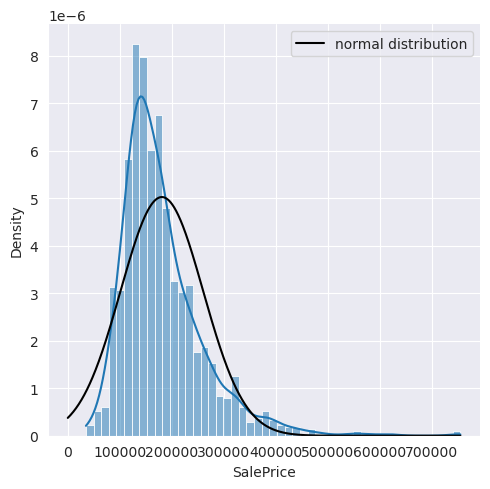

In [15]:
g = sns.displot(data=data.SalePrice, kde=True, stat='density')

# fit the normal distribution to the data for comparison
(mu, sigma) = norm.fit(data.SalePrice)
print("mean of SalePrice:", mu)
print("SD of SalePrice:", sigma)

# plot the normal density with the same parameters mu, sigma as in the data
x = np.linspace(0, data.SalePrice.max(), 1000)
g.ax.plot(x, norm.pdf(x, mu, sigma), 'k-', label='normal distribution')

plt.legend(loc='best')

The histogram shows that the target variable is right-skewed. Let us take its logarithm and check whether its distribution is closer to normal.

mean of log(SalePrice): 12.024057394918406
SD of log(SalePrice): 0.39931245219387496


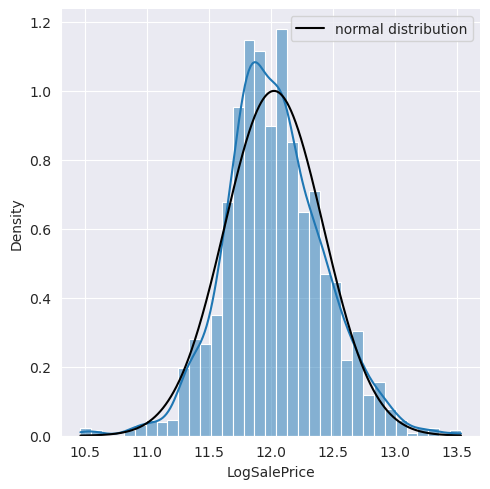

In [16]:
# plot the logarithm of SalePrice
data['LogSalePrice'] = np.log1p(data.SalePrice)

# g = sns.displot(data=data.LogSalePrice, kde=True, stat='density')
g = sns.displot(data=data['LogSalePrice'], kde=True, stat='density')

# fit the normal distribution to the data for comparison
(mu, sigma) = norm.fit(data['LogSalePrice'])
print("mean of log(SalePrice):", mu)
print("SD of log(SalePrice):", sigma)

# plot the normal density with the same parameters mu, sigma as in the data
x = np.linspace(data['LogSalePrice'].min(), data['LogSalePrice'].max(), 1000)
g.ax.plot(x, norm.pdf(x, mu, sigma), 'k-', label='normal distribution')

plt.legend(loc='best')

The distribution of the logarithm is indeed much closer to the normal! It is going to be used as the new target variable. 

In [17]:
orig_target = 'SalePrice'
target = 'LogSalePrice'

# remove the original target here. to-MOVE here
data.drop(columns=orig_target, inplace=True)

# Correlation of 'LotFrontage' with the new target after different options for filling missing values.

In [18]:
# correlation with log(SalePrice) before filling the missing values.
# data.LotFrontage.corr(data.LogSalePrice)
data.LotFrontage.corr(data[target])
# 0.3559

0.3558786203664002

Check the variations in correlation after filling the missing values using different methods.

In [19]:
list_to_check = [0, data.LotFrontage.min(), data.LotFrontage.max(), data.LotFrontage.mean(), data.LotFrontage.median(),\
                    data.LotFrontage.quantile(0.3), data.LotFrontage.quantile(0.4), data.LotFrontage.quantile(0.6),\
                    data.LotFrontage.quantile(0.7)]
# method for filling the missing val with a constant equal 0 or a statistic of the column

list_of_names = ['0', 'min', 'max', 'mean', 'median', 'quantile 0.3', 'quantile 0.4', 'quantile 0.6', 'quantile 0.7']
list_of_methods = ['bfill', 'ffill']  # fill with the next (bfill) or the previous (ffill) valid value

In [20]:
# print the list of candidates.
print(list_to_check)

[0, 21.0, 313.0, 70.04995836802665, 69.0, 60.0, 63.0, 74.0, 79.0]


In [21]:
# correlation with log(SalePrice) before filling the missing values.
# data.LotFrontage.corr(data.LogSalePrice)
data.LotFrontage.corr(data[target])
# 0.3559

0.3558786203664002

In [22]:
# correlations with the column 'LogSalePrice'

"""
method: 0, correlation value: 0.1793
method: min, correlation value: 0.2272
method: max, correlation value: 0.1208
method: mean, correlation value: 0.3362
method: median, correlation value: 0.3353
method: quantile 0.3, correlation value: 0.3235
method: quantile 0.4, correlation value: 0.3283
method: quantile 0.6, correlation value: 0.3384
method: quantile 0.7, correlation value: 0.3390
method: bfill, correlation value: 0.3036
method: ffill, correlation value: 0.2996
"""

for el in list_to_check:
    print('method: {}, correlation value: {:.4f}'.format(list_of_names[list_to_check.index(el)], \
                                                     data.LotFrontage.fillna(el).corr(data.LogSalePrice)))
for el in list_of_methods:
    print('method: {}, correlation value: {:.4f}'.format(el, \
                                                     data.LotFrontage.fillna(method=el).corr(data.LogSalePrice)))

method: 0, correlation value: 0.1793
method: min, correlation value: 0.2272
method: max, correlation value: 0.1208
method: mean, correlation value: 0.3362
method: median, correlation value: 0.3353
method: quantile 0.3, correlation value: 0.3235
method: quantile 0.4, correlation value: 0.3283
method: quantile 0.6, correlation value: 0.3384
method: quantile 0.7, correlation value: 0.3390
method: bfill, correlation value: 0.3036
method: ffill, correlation value: 0.2996


Conclusion: filling with quantile 0.7 (equal 79 feet) provides the highest correlation with the target variable. It is a bit smaller than the correlation before filling missing values. 

In [23]:
data.LotFrontage.fillna(data.LotFrontage.quantile(0.7), inplace=True)

In [24]:
# Check the percentage of rows without missing values
data.dropna().shape[0] / data.shape[0]
# 0.9164.
# This corresponds indeed to the previous result.

0.9164383561643835

To simplify the model, drop the columns with remaining missing values.

In [25]:
data.dropna(inplace=True)

data.shape
# (1338, 75)

(1338, 75)

# Correlations between numerical variables.

In [26]:
# Select the numerical features.
num_data = data.select_dtypes(include='number')

print(num_data.shape)
# (1338, 37)

(1338, 37)


Show the correlations between the features, which are most correlated with the target variable.

In [27]:
k = 8
corrmat = num_data.corr()
cols = corrmat.nlargest(k, target).index.tolist() # TO-FIX in the model as well!

# corrmat.nlargest(k, target) : DataFrame (all correlations), where only 'k' rows of highest correlation with the target are selected.
# The following operations extract the names of features.

cols
# As expected, the target variable 'LogSalePrice' is at the 1st position.

['LogSalePrice',
 'OverallQual',
 'GrLivArea',
 'GarageCars',
 'GarageArea',
 'FullBath',
 '1stFlrSF',
 'TotalBsmtSF']

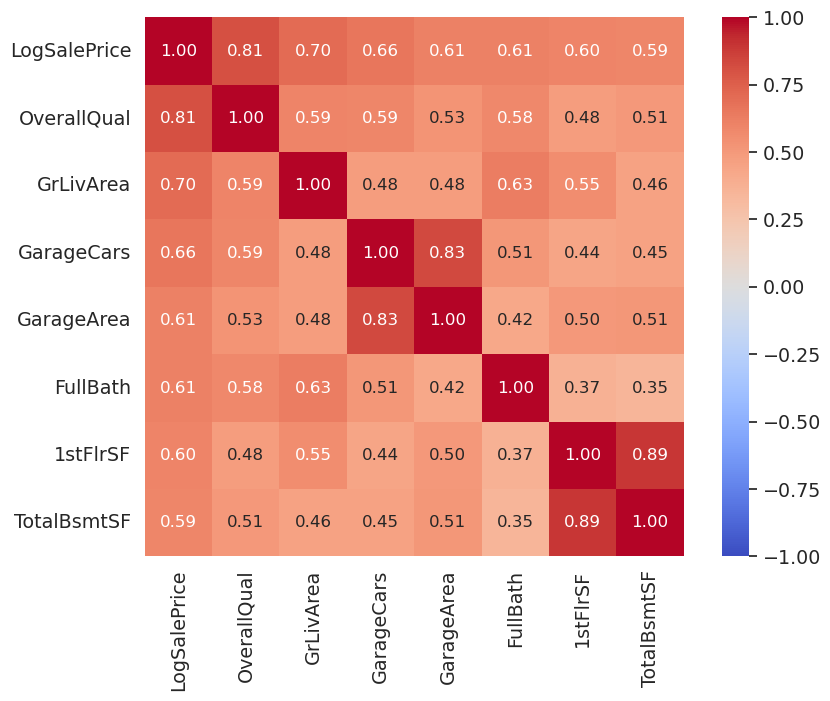

In [28]:
cm = np.corrcoef(num_data[cols].values, rowvar=False)

plt.figure(figsize=(10,7))
sns.set_theme(font_scale=1.25)

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

In [29]:
# The features 'GarageCars' , 'TotalBsmtSF' should be dropped because of high correlation with other ones.
num_data.drop(columns=['GarageCars', 'TotalBsmtSF'], inplace=True)

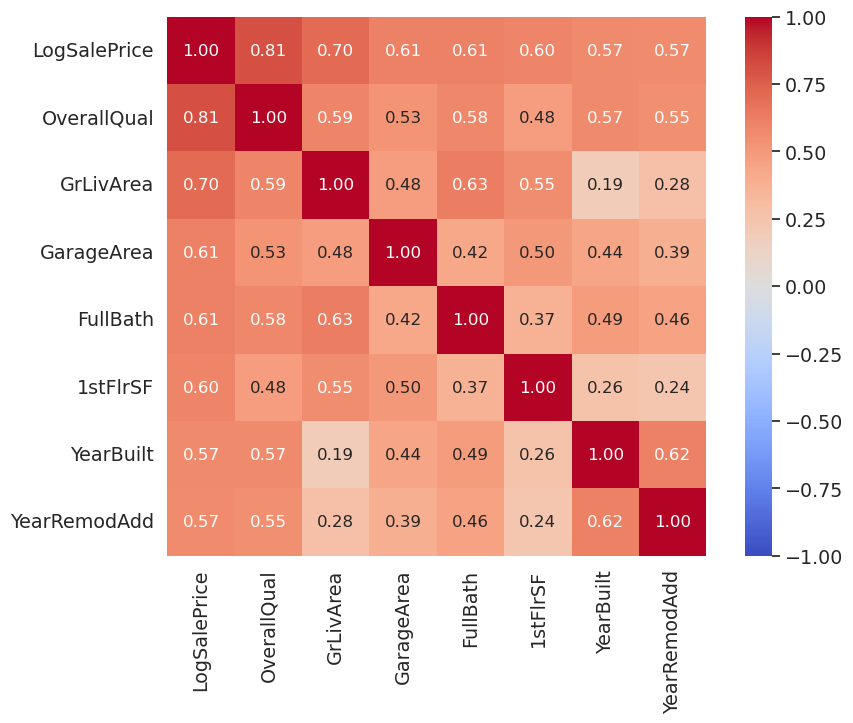

In [30]:
# The new chart with 8 features most correlated with the target.

corrmat = num_data.corr()
cols = corrmat.nlargest(k, target)[target].index.tolist()

cm = np.corrcoef(num_data[cols].values, rowvar=False)
plt.figure(figsize=(10,7))

sns.set_theme(font_scale=1.25)

sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 12},\
                yticklabels=cols, xticklabels=cols, vmin=-1, center=0,\
                    cmap=sns.color_palette('coolwarm',1000))
plt.show()

In [31]:
# Let us look at the top descriptive statistics of the target variable and of the 1st four features from this table.
# This information will be useful for making the model.
data[cols[:5]].describe()

# These feature are clearly of different ranges! Normalization will be necessary.
# The new target variable is located between 10.5 and 13.5 with 'std' equal 0.4 

,LogSalePrice,OverallQual,GrLivArea,GarageArea,FullBath
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,12.063498,6.219731,1537.585202,501.449925,1.575486
std,0.376846,1.324472,520.579960,186.761863,0.547570
min,10.471978,2.000000,438.000000,160.000000,0.000000
25%,11.813037,5.000000,1160.000000,377.500000,1.000000
50%,12.034697,6.000000,1480.000000,484.000000,2.000000
75%,12.301387,7.000000,1791.500000,583.000000,2.000000
max,13.534474,10.000000,5642.000000,1418.000000,3.000000


These feature are of different ranges! Normalization will be necessary.

The new target variable is located between 10.5 and 13.5 with 'std' equal 0.4 

# Categorial features.

The first inspection plots the effect of two variables and the summary statistics.

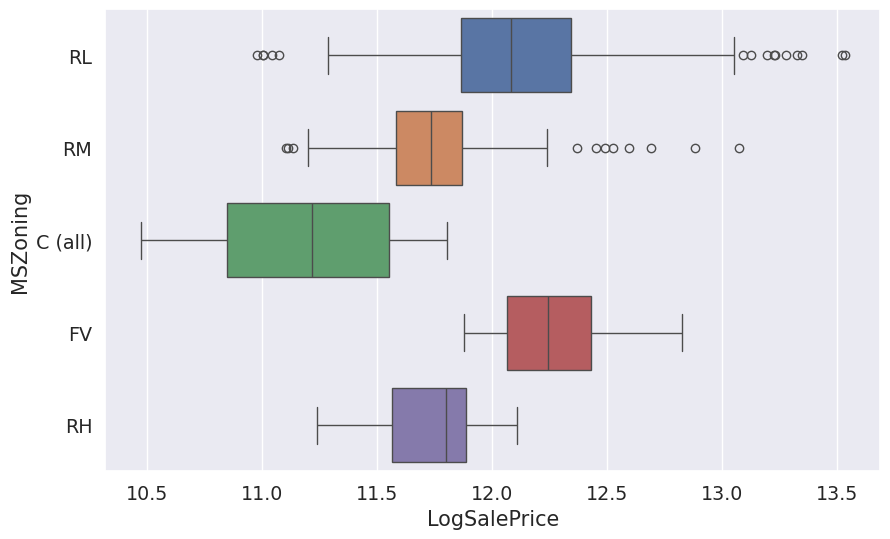

In [32]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x=target, y='MSZoning', hue='MSZoning')
plt.show()

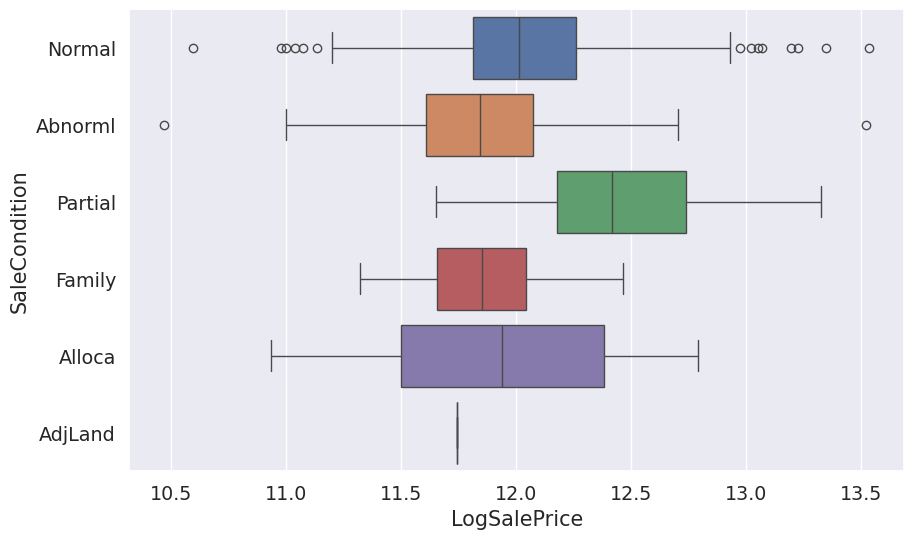

In [33]:
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x=target, y='SaleCondition', hue='SaleCondition')
plt.show()

The descriptive statistics of the categorial variables.

In [34]:
data.select_dtypes(include='object').describe()

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
count,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338,...,1338,1338,1338,1338,1338,1338,1338,1338,1338,1338
unique,5,2,4,4,2,5,3,25,9,8,...,5,4,7,6,3,5,5,3,9,6
top,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
freq,1066,1333,829,1206,1337,957,1265,209,1162,1324,...,1242,650,1254,852,580,1270,1287,1257,1158,1104


Boxplot of 'SalePrice' as function of 'Overall Quality'
(the feature with highest correlation among those with numerical values).

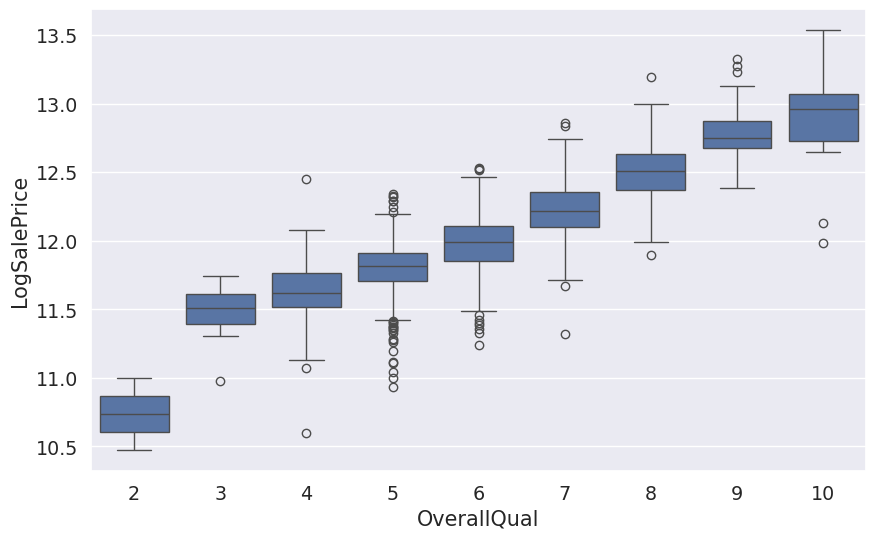

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='OverallQual', y=target)
plt.show()

The categorical features are not used in the current bayesian model in order to keep a limited number of variables. A more advanced future model may select the most relevant categorical features using, for instance, the library 'ppscore'. 